# Analytics and Data model testing stuffs

Notebook to investigate various NEM datasets for setting initial parameters.

Also testing nempy data management.

Not prod or anything, just needed a place to run python code snippets with no organisation.

In [35]:
import datetime
import sqlite3
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
#con = sqlite3.connect("E:\Code\Calliope\db\historical.db")
con = sqlite3.connect("E:\Code\Calliope/notebooks\historical_mms.db")

import nempy

Understand and find representative generators in NSW in order to use them for bids.

We'll just hardcode these DUIDs so that we can reduce data processing times and have a representative mix regardless.

In [1]:
import pandas as pd

df = pd.read_csv('uniform_auction.csv')[['Quantity','Price']]

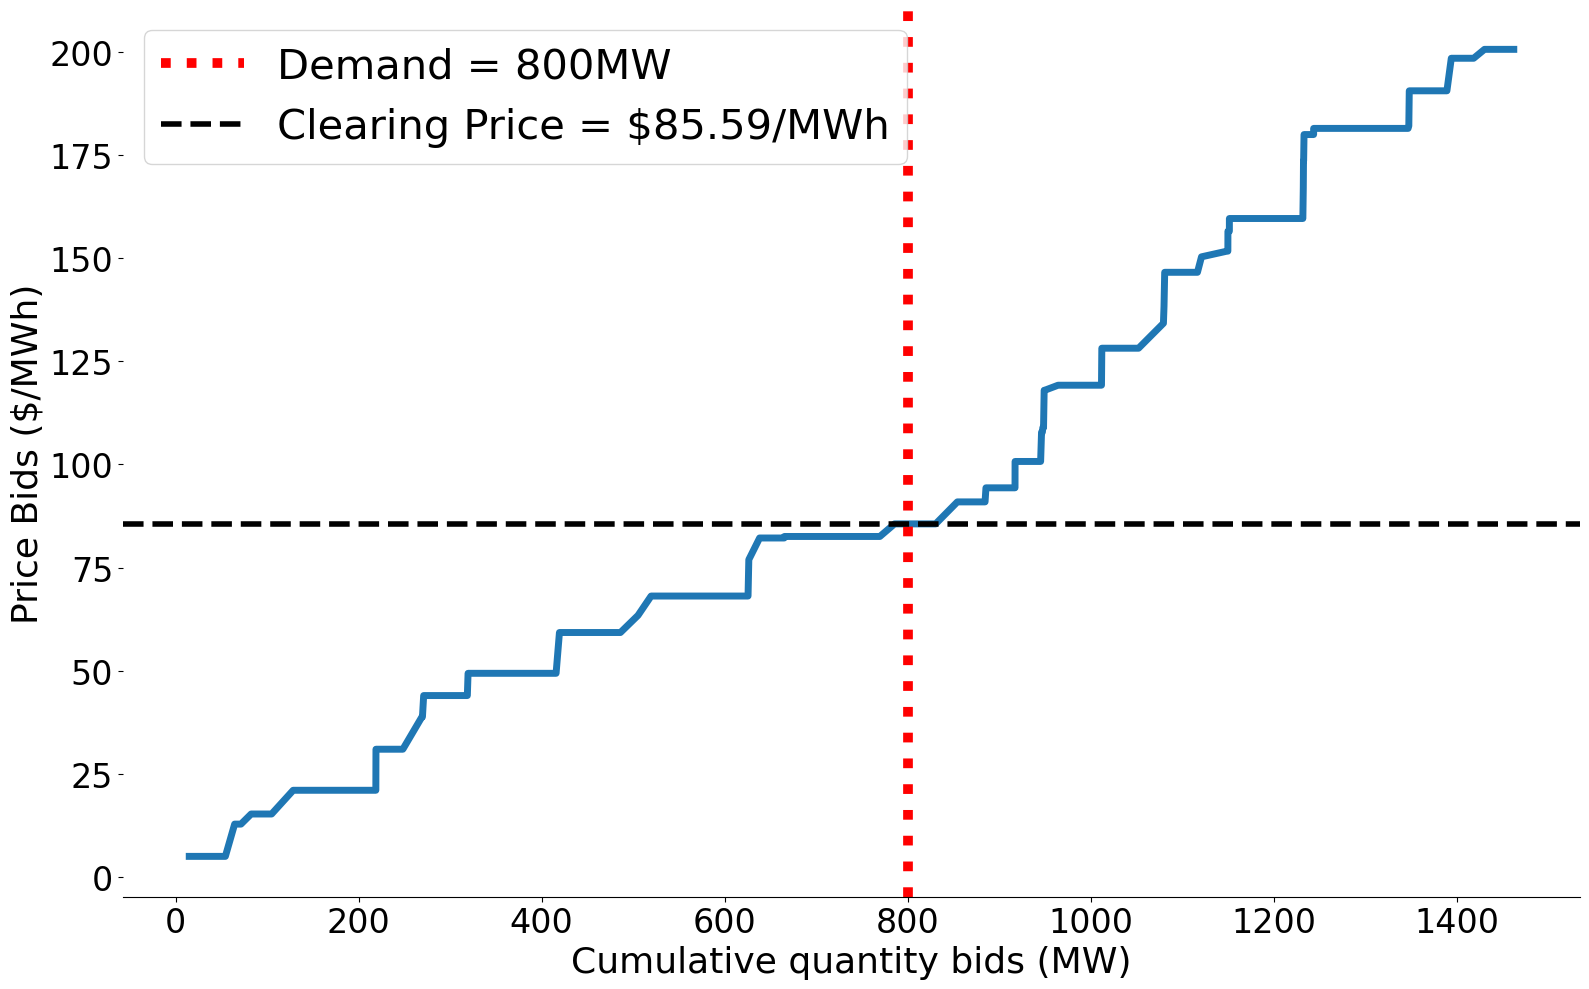

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,10))

demand=800
mcp = df.loc[df.Quantity <= demand, 'Price'].iloc[-1]
ax.plot(df.Quantity, df.Price, linewidth=5)
plt.axvline(demand, linewidth=7, color='r', linestyle='dotted', label=f'Demand = {demand}MW')
plt.axhline(mcp, linewidth=4, color='black', linestyle='dashed', label=f'Clearing Price = ${mcp}/MWh')
ax.set_xlabel('Cumulative quantity bids (MW)', fontsize=26)
ax.set_ylabel('Price Bids ($/MWh)', fontsize=26)
ax.xaxis.set_tick_params(labelsize=24)
ax.yaxis.set_tick_params(labelsize=24)
fig.tight_layout()
# fig.suptitle("Uniform Price Auction", size=24)
# fig.subplots_adjust(top=0.95)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.legend(fontsize=30)

plt.savefig('uniform_price_auction.png', bbox_inches='tight', dpi=250)

In [4]:
from calliope import data

unit_mapping = data.get_unit_region_mapping(con)
nsw_duids = unit_mapping.loc[(unit_mapping.REGIONID == 'NSW1') & (unit_mapping.DISPATCHTYPE == 'GENERATOR'), 'DUID'].tolist()

In [10]:
#bids
start_date = '2019/01/01'
end_date = '2019/02/01'

query = """
    select 
    *
    from BIDPEROFFER_D
    where duid in ({})
    and INTERVAL_DATETIME between ? and ?
    and bidtype = 'RAISEREG'
""".format(', '.join(['?' for _ in nsw_duids]))

param_list = nsw_duids+[start_date, end_date]
df = pd.read_sql(query, con=con, params=param_list)




In [ ]:
df.groupby('DUID')[[f'BANDAVAIL{i}' for i in range(1,11)]].mean()

In [45]:
#bids
start_date = '2019/01/01'
end_date = '2020/01/01'

query = """
    select 
    SETTLEMENTDATE, DUID, BIDTYPE, 
    PRICEBAND1, PRICEBAND2, PRICEBAND3, PRICEBAND4, PRICEBAND5, 
    PRICEBAND6, PRICEBAND7, PRICEBAND8, PRICEBAND9, PRICEBAND10
    from BIDDAYOFFER_D
    where duid in ({})
    and settlementdate between ? and ?
    and bidtype = 'ENERGY'

""".format(', '.join(['?' for _ in nsw_duids]))

param_list = nsw_duids+[start_date, end_date]
df_pb = pd.read_sql(query, con=con, params=param_list)




In [48]:
df_pb.groupby('DUID')[[f'PRICEBAND{i}' for i in range(1,11)]].mean()

,PRICEBAND1,PRICEBAND2,PRICEBAND3,PRICEBAND4,PRICEBAND5,PRICEBAND6,PRICEBAND7,PRICEBAND8,PRICEBAND9,PRICEBAND10
DUID,,,,,,,,,,
BERYLSF1,-96.240602,-28.834586,0.075188,1.112782,2.225564,8.300752,16.601504,33.203008,128.000000,12519.939850
BLOWERNG,-964.480274,0.000000,9.539315,14.308959,19.073616,23.848274,28.612932,33.382575,38.152247,47.686548
BOCORWF1,-958.190219,-200.000000,-150.000000,-100.000000,-50.000000,0.000000,100.000000,200.000000,300.000000,13908.706384
BODWF1,-965.566849,-964.601973,-110.074795,-77.244356,-57.932027,-1.929753,286.770466,4815.285973,12366.149726,14096.449726
BROKENH1,-866.836438,-796.970082,-42.720000,0.000000,38.834110,77.658137,291.238055,1456.180356,12134.771123,12641.824000
BW01,-956.522192,0.000000,34.774247,50.388712,62.798055,78.073699,139.156658,275.363808,440.865507,13966.240247
BW02,-956.522192,0.000000,34.774247,50.388712,62.798055,78.073699,139.156658,275.363808,440.865507,13966.240247
BW03,-957.667671,0.000000,34.820795,50.452411,62.875589,78.172219,139.342192,275.694959,441.382904,13982.910192
BW04,-957.667671,0.000000,34.820795,50.452411,62.875589,78.172219,139.342192,275.694959,441.382904,13982.910192


# Merit order prices charts

In [1]:
from calliope.prices import construct_prices_from_merit_order_csv
from calliope.defaults import MARKETS
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import pandas as pd

In [2]:
prices = construct_prices_from_merit_order_csv(
    path='merit_order_prices.csv', 
    region_id= 'NSW1', 
    start_date = '2019/07/01', 
    end_date='2019/09/01', 
    create_agc=True
)
prices_df = prices.to_dataframe()

In [3]:
prices_df_pm = pd.read_csv("E:\Code\Calliope/results/SAC_JOINT_JantoJune_PM_all_longtrain_arb_indicator_noreg_160000_steps_pm_results_df.csv")

In [4]:
prices_df_pm = pd.read_csv("E:\Code\Calliope/results/price_maker_energy_only_results.csv")

In [17]:
prices_df_pm['price_diff'] = price_diff
prices_df_pm['ROP'] = prices_df['ROP']

In [18]:
prices_df_pm[['ENERGY_dispatch','ROP','ENERGY_price','price_diff']].sort_values(['price_diff'])

,ENERGY_dispatch,ROP,ENERGY_price,price_diff
0,-189.55,24.44,-959.8,-984.24
8980,7.96,-100.00,-756.6,-656.60
3624,52.18,-100.00,-756.6,-656.60
3622,55.25,-100.00,-756.6,-656.60
3639,41.19,-30.00,-100.0,-70.00
...,...,...,...,...
5814,-125.22,-829.80,-100.0,729.80
14146,-99.77,-829.80,-100.0,729.80
6084,-60.70,-829.80,-100.0,729.80
14144,-126.23,-829.80,-100.0,729.80


In [5]:
from calliope.defaults import FCAS_SERVICES

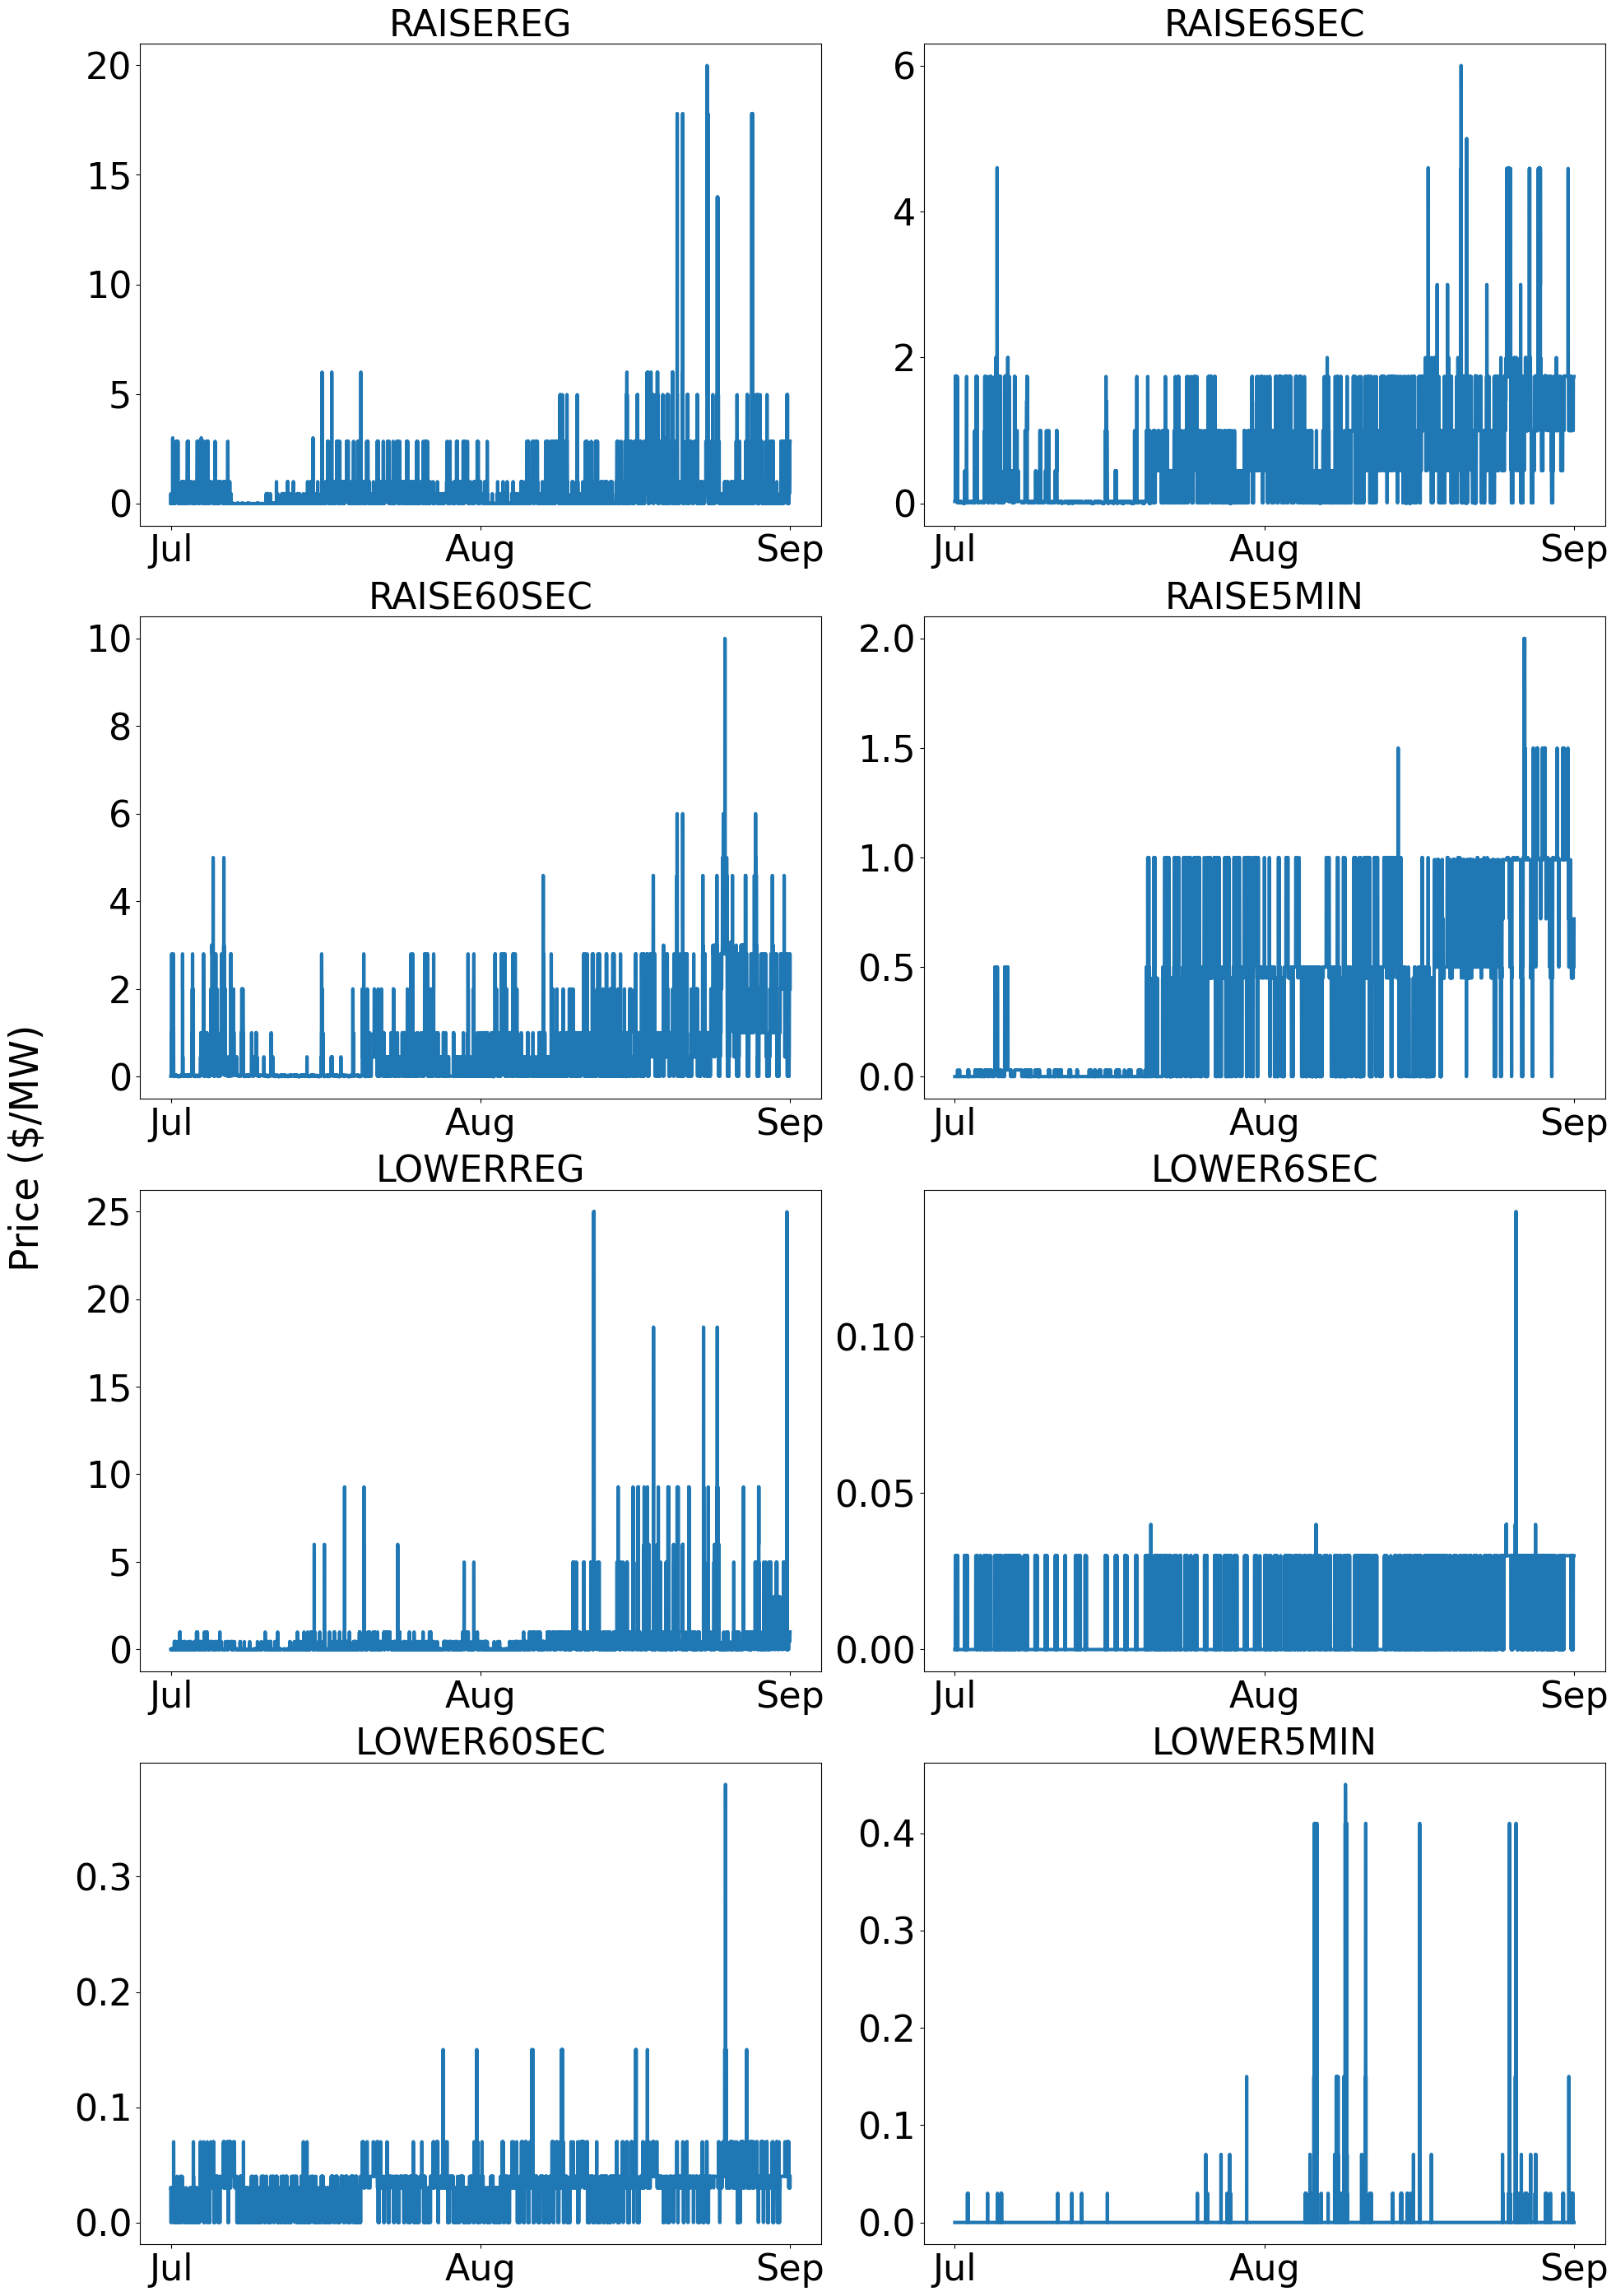

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20,28))

for m in range(len(FCAS_SERVICES)):
    service=FCAS_SERVICES[m]

    service_rop = service
    if service == 'ENERGY':
        service_rop = ''
    price_diff = prices_df[f'{service_rop}ROP']


    from matplotlib.ticker import FuncFormatter
    ax[m//2][m%2].set_title(f'{service}', fontsize=32)

    ax[m//2][m%2].xaxis.set_major_locator(mdates.MonthLocator([7,8,9]))
    ax[m//2][m%2].plot(prices_df.SETTLEMENTDATE, price_diff, linewidth=3)
    ax[m//2][m%2].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    # ax[m//4][m%4].set_xlabel('SETTLEMENTDATE', fontsize=16)
    # ax[m//4][m%4].set_ylabel('Price Difference ($/MWh)', fontsize=16)
    ax[m//2][m%2].xaxis.set_tick_params(labelsize=32)
    ax[m//2][m%2].yaxis.set_tick_params(labelsize=32)

    fig.supylabel('Price ($/MW)', fontsize=34)

    fig.tight_layout()
    # fig.suptitle("Price difference with and without PM-DRL bidding for Jul-Aug", size=20)
    fig.subplots_adjust(left=0.1)


In [49]:
fig.savefig(f'price_maker_pmdrl_fcas_clearing_price_diff.png', bbox_inches='tight', dpi=250)


<Axes: >

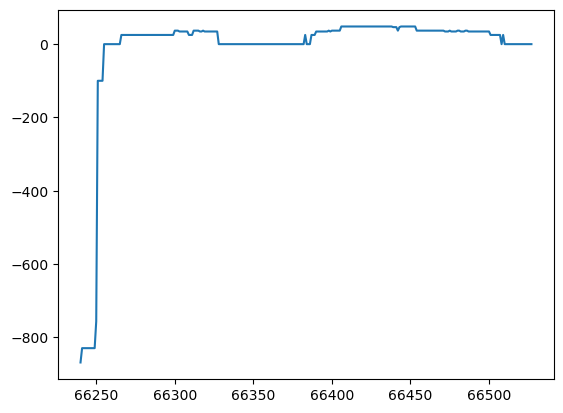

In [31]:
daynum = 230
prices_df.ROP[288*daynum:288*(daynum+1)].plot()

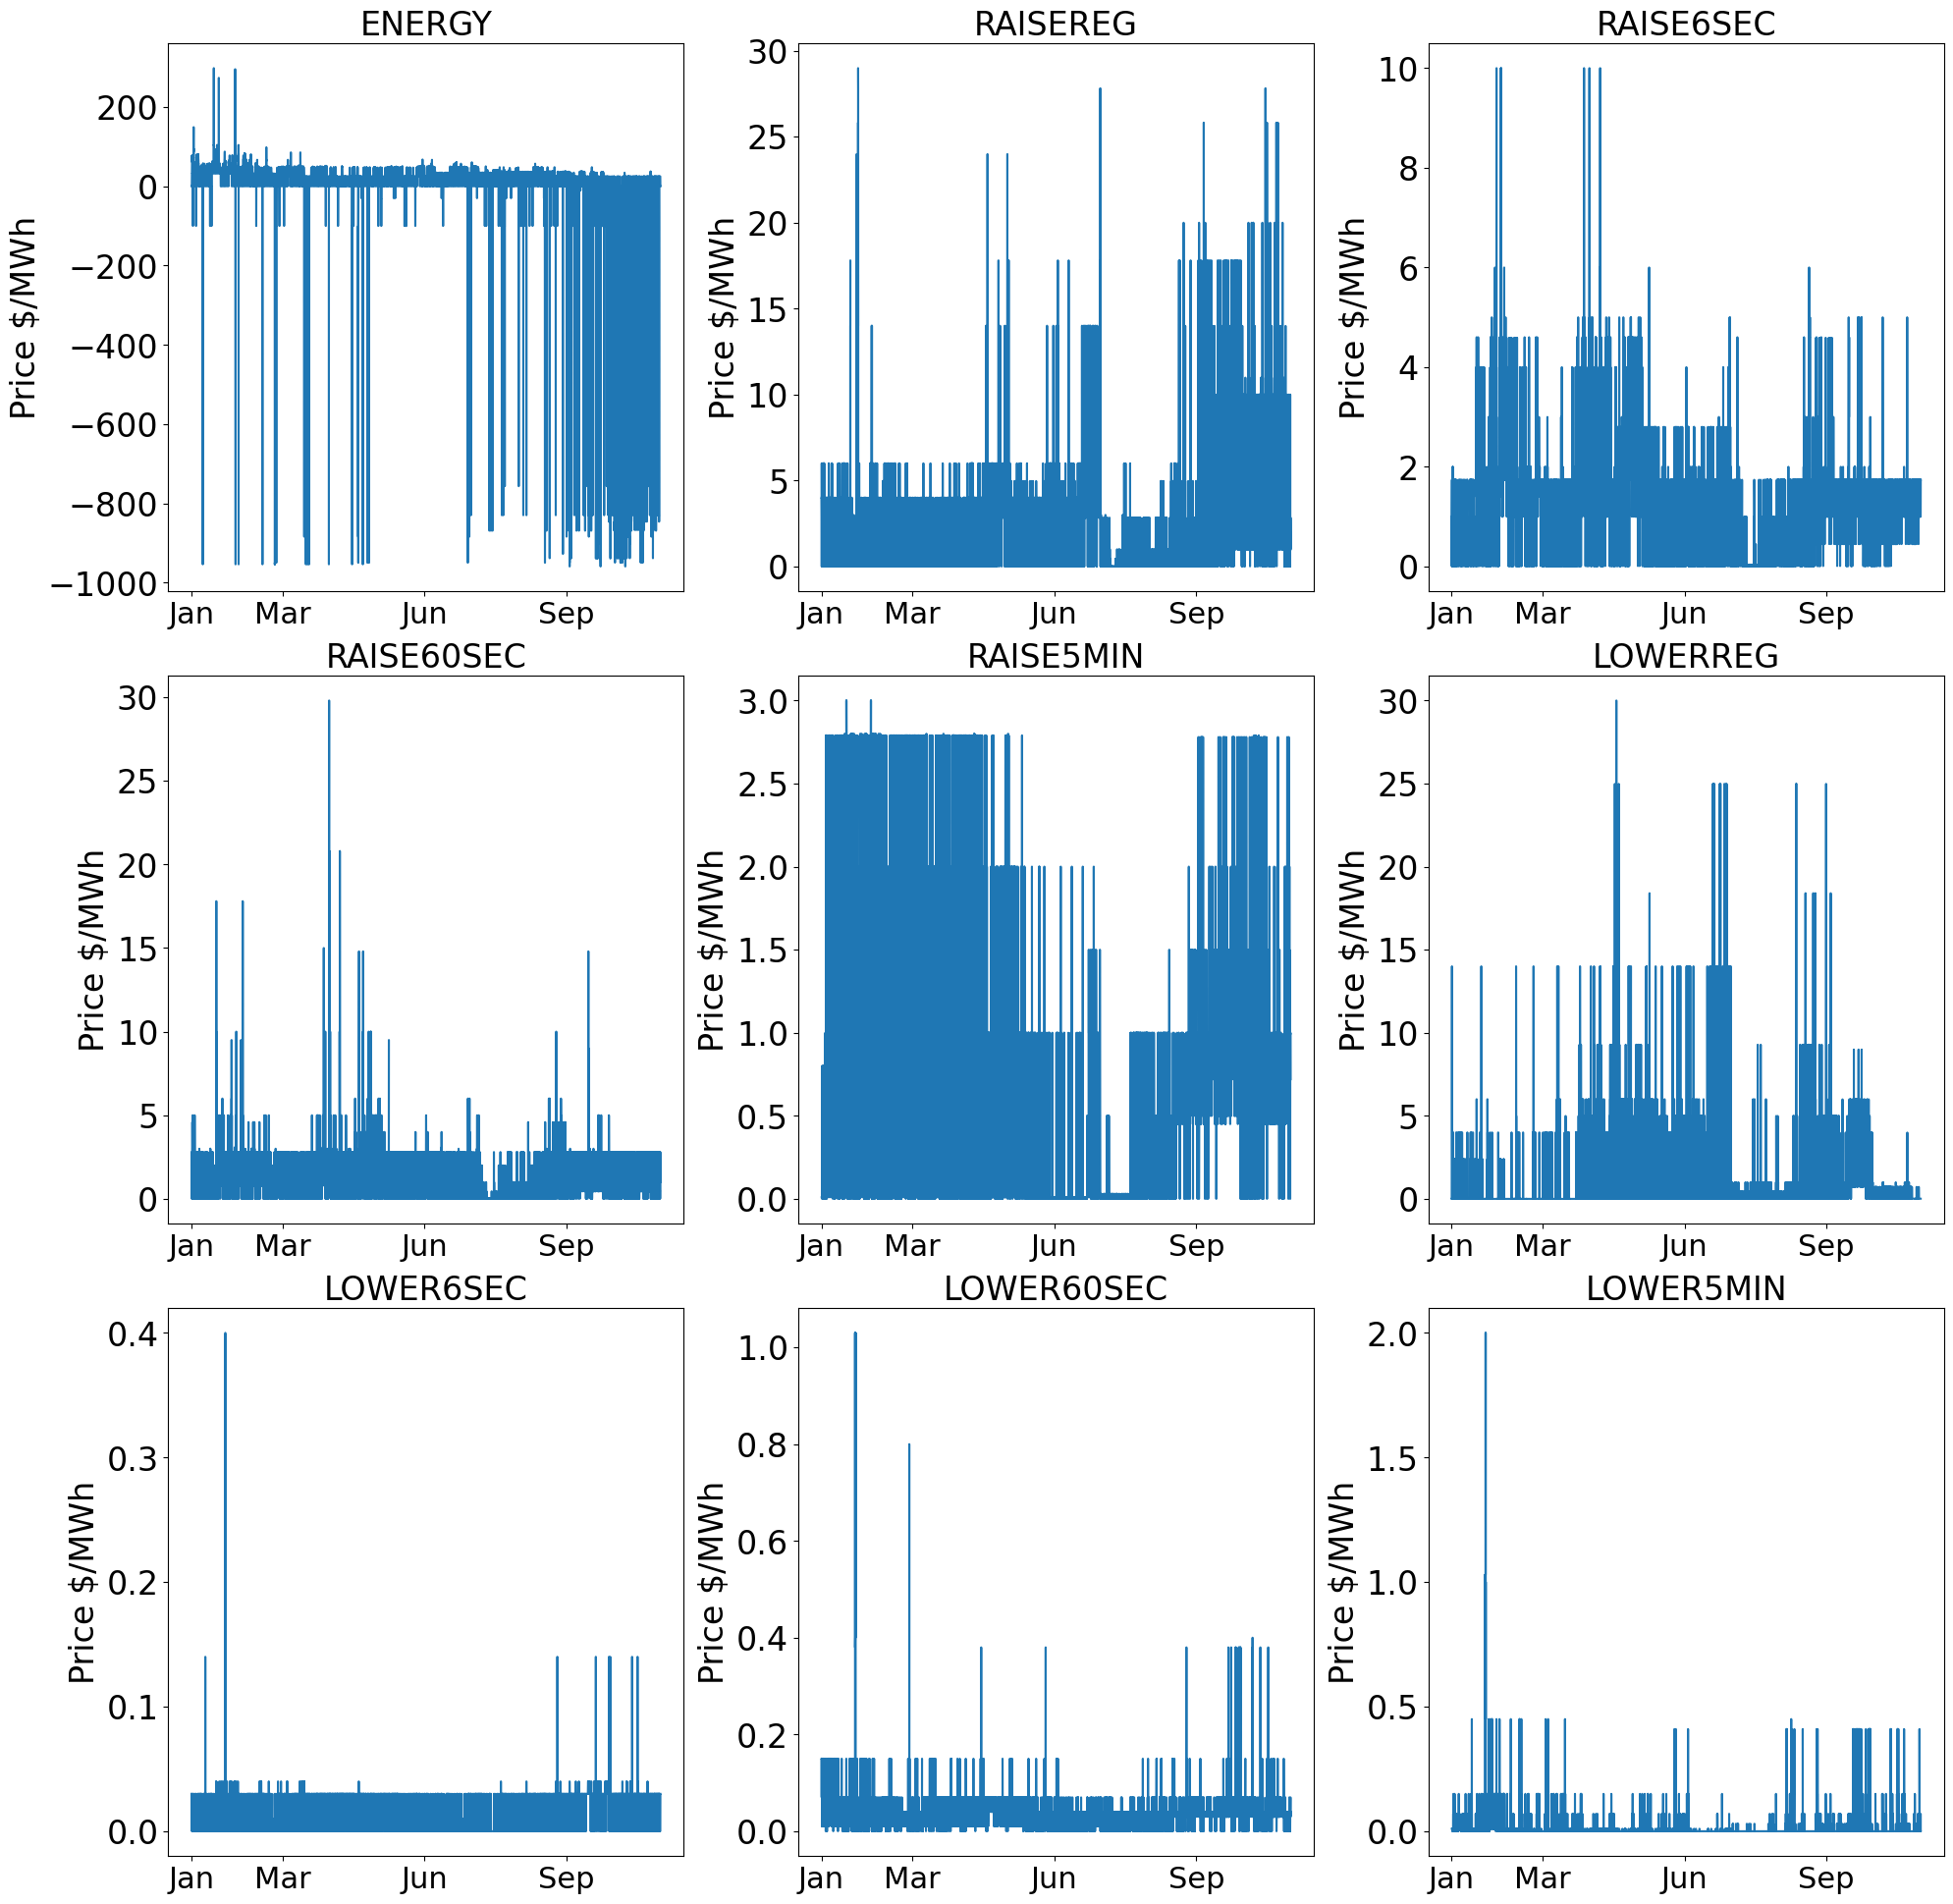

In [25]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(20,20))

for m in range(len(MARKETS)):
    mname = MARKETS[m]
    m1 = mname
    if mname == 'ENERGY':
        m1 = ''

    # plot the time series prices
    ax[m//3][m%3].plot(prices_df['SETTLEMENTDATE'], prices_df[f'{m1}ROP'], label=f'{m1}ROP')
    
    # set the titles
    ax[m//3][m%3].set_title(f'{mname}', fontsize=24)

    # set tick labels as months
    ax[m//3][m%3].xaxis.set_major_locator(mdates.MonthLocator([1,3,6,9]))
    ax[m//3][m%3].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax[m//3][m%3].xaxis.set_tick_params(labelsize=22)
    ax[m//3][m%3].yaxis.set_tick_params(labelsize=24)
    # ax[m//3][m%3].set_xlabel('Month', fontsize=16)
    ax[m//3][m%3].set_ylabel('Price $/MWh', fontsize=24)

fig.tight_layout()
# fig.suptitle("MeritOrderNEM output market prices for Jan-Nov 2019", size=20)
fig.subplots_adjust(top=0.95)
  
plt.show()
fig.savefig('market_prices_nem_timeseries.png', bbox_inches='tight', dpi=250)


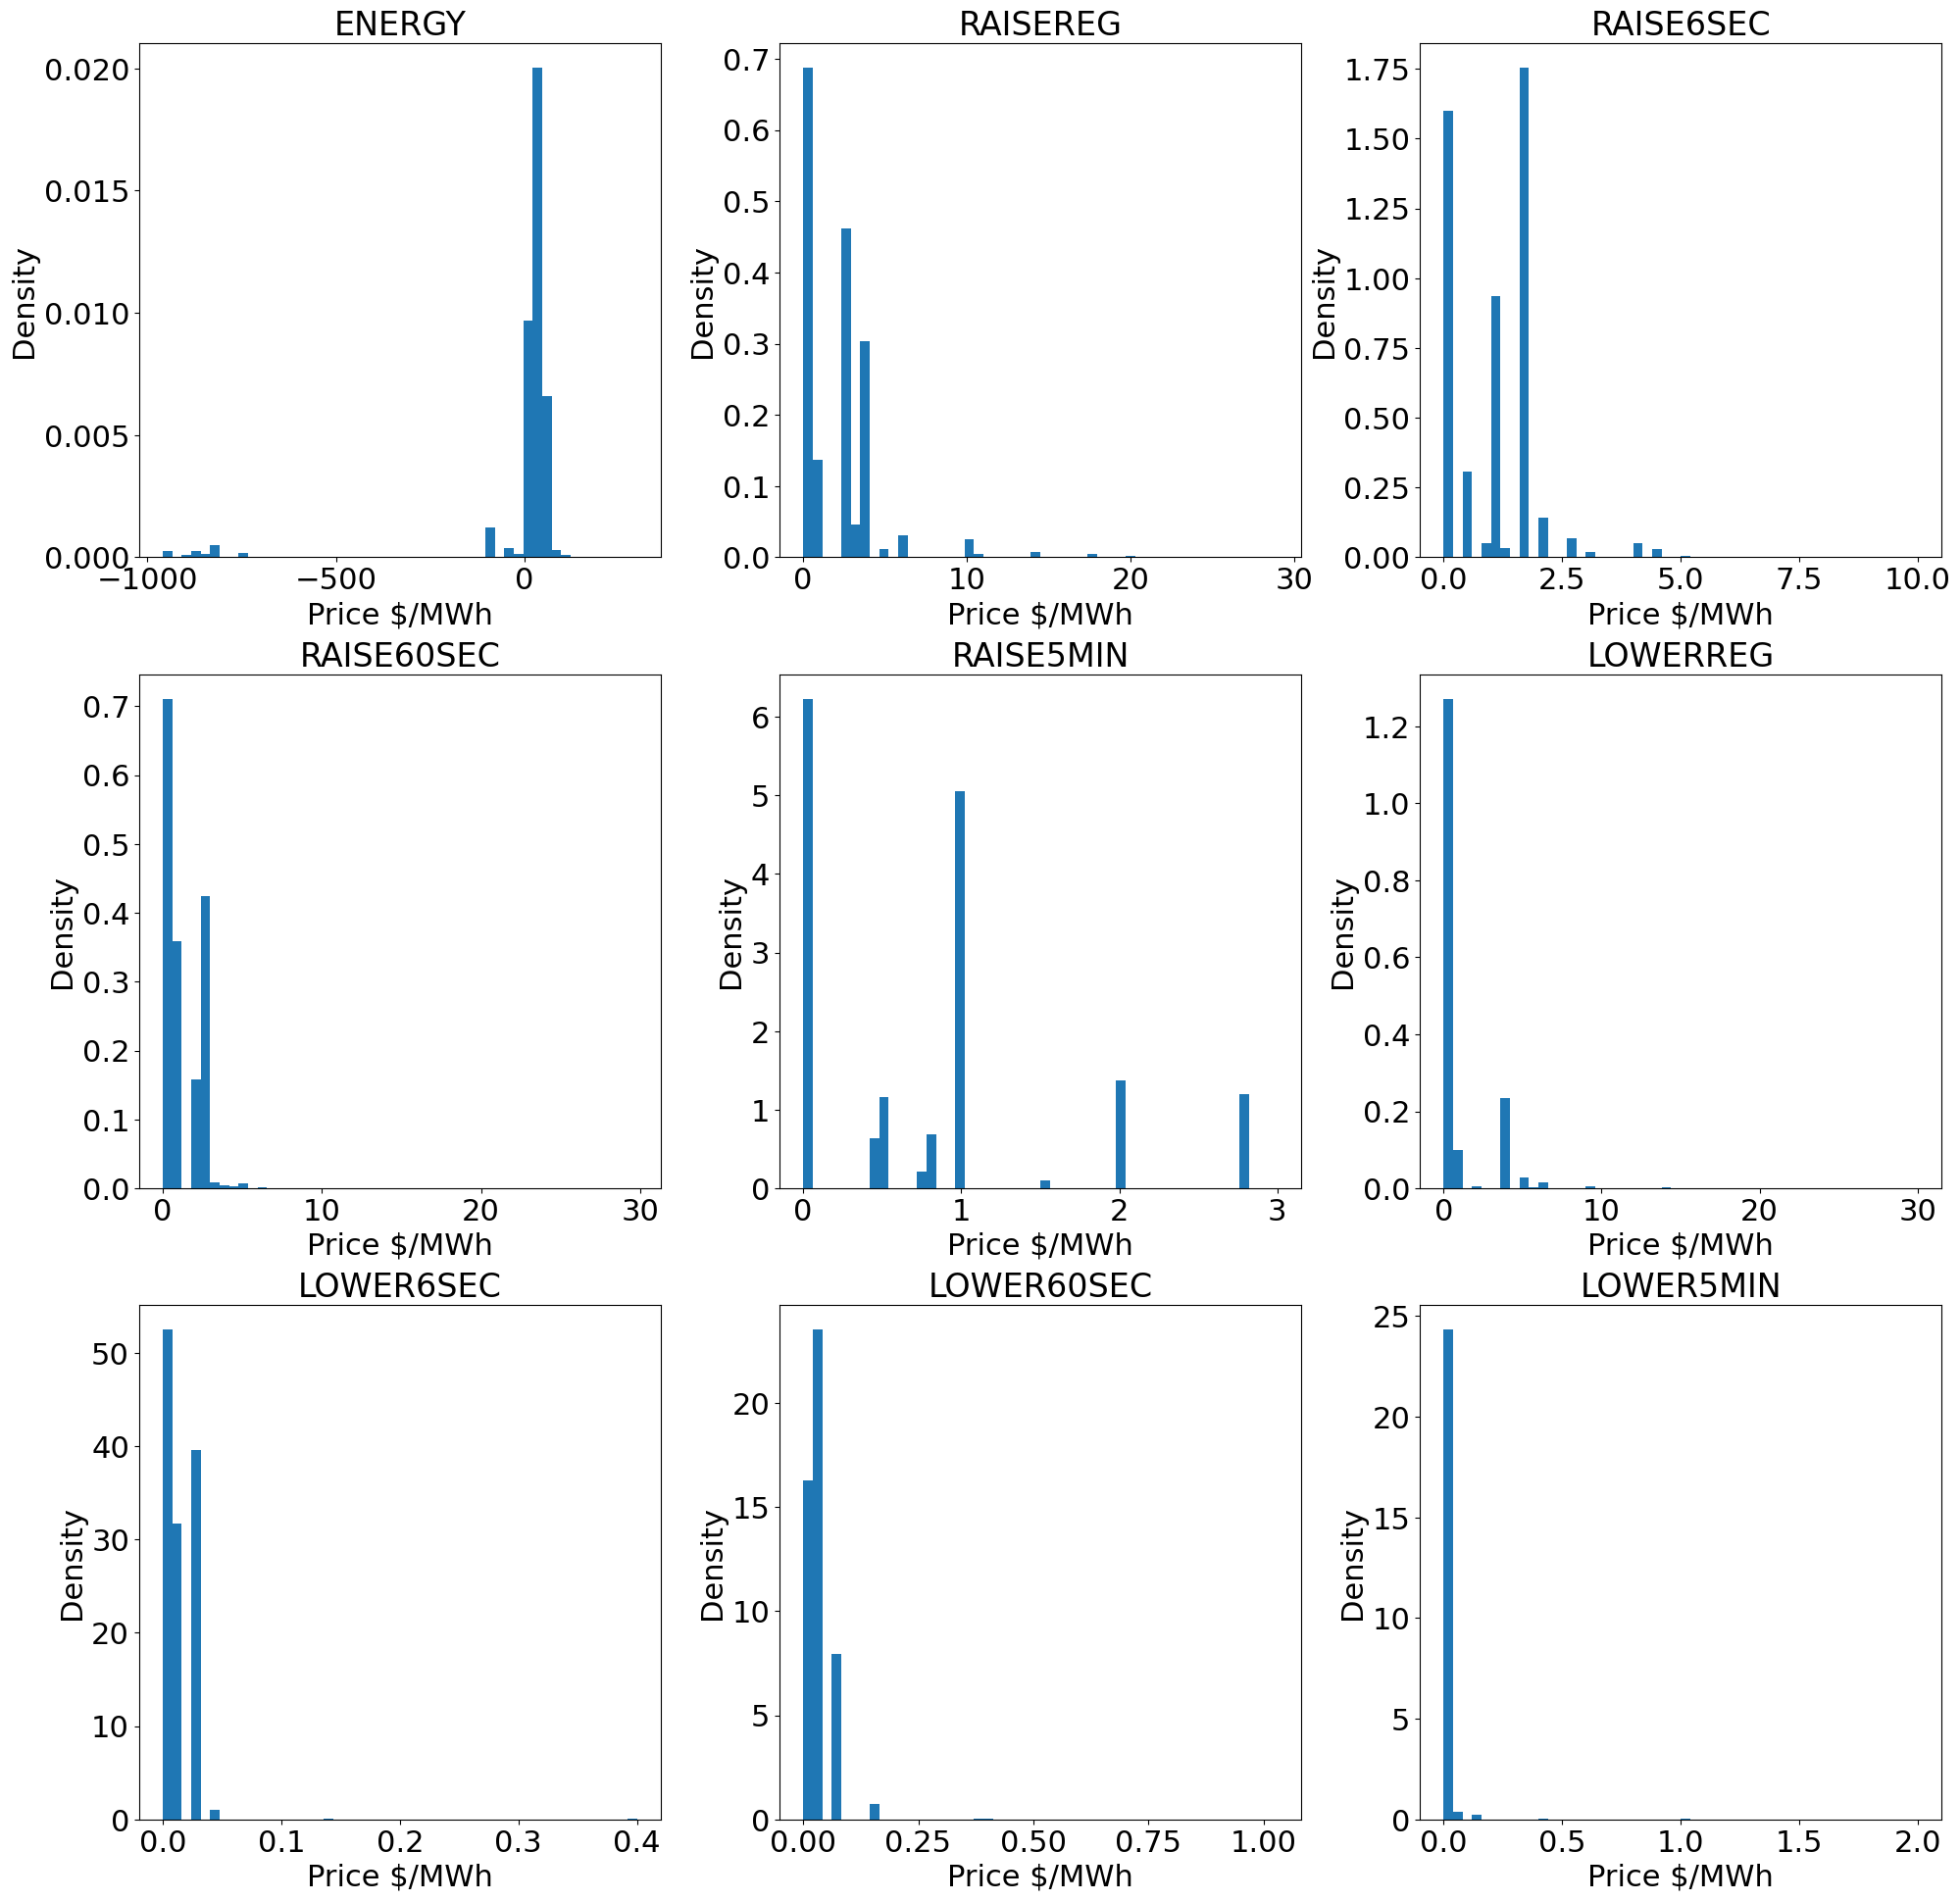

In [23]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(20,20))

for m in range(len(MARKETS)):
    mname = MARKETS[m]
    m1 = mname
    if mname == 'ENERGY':
        m1 = ''

    # plot the time series prices
    ax[m//3][m%3].hist( prices_df[f'{m1}ROP'], bins=50, label=f'{m1}ROP', density=True)
    
    # set the titles
    ax[m//3][m%3].set_title(f'{mname}', fontsize=24)
    ax[m//3][m%3].xaxis.set_tick_params(labelsize=22)
    ax[m//3][m%3].yaxis.set_tick_params(labelsize=22)
    ax[m//3][m%3].set_ylabel('Density', fontsize=22)
    ax[m//3][m%3].set_xlabel('Price $/MWh', fontsize=22)

fig.tight_layout()
# fig.suptitle("MeritOrderNEM density of output market prices for Jan-Oct 2019", size=22)
fig.subplots_adjust(top=0.95)
  
plt.show()


In [18]:
prices_df_tosep = prices_df.loc[prices_df.SETTLEMENTDATE <= '2019-09-01']
prices_df_fromsep = prices_df.loc[prices_df.SETTLEMENTDATE > '2019-09-01']

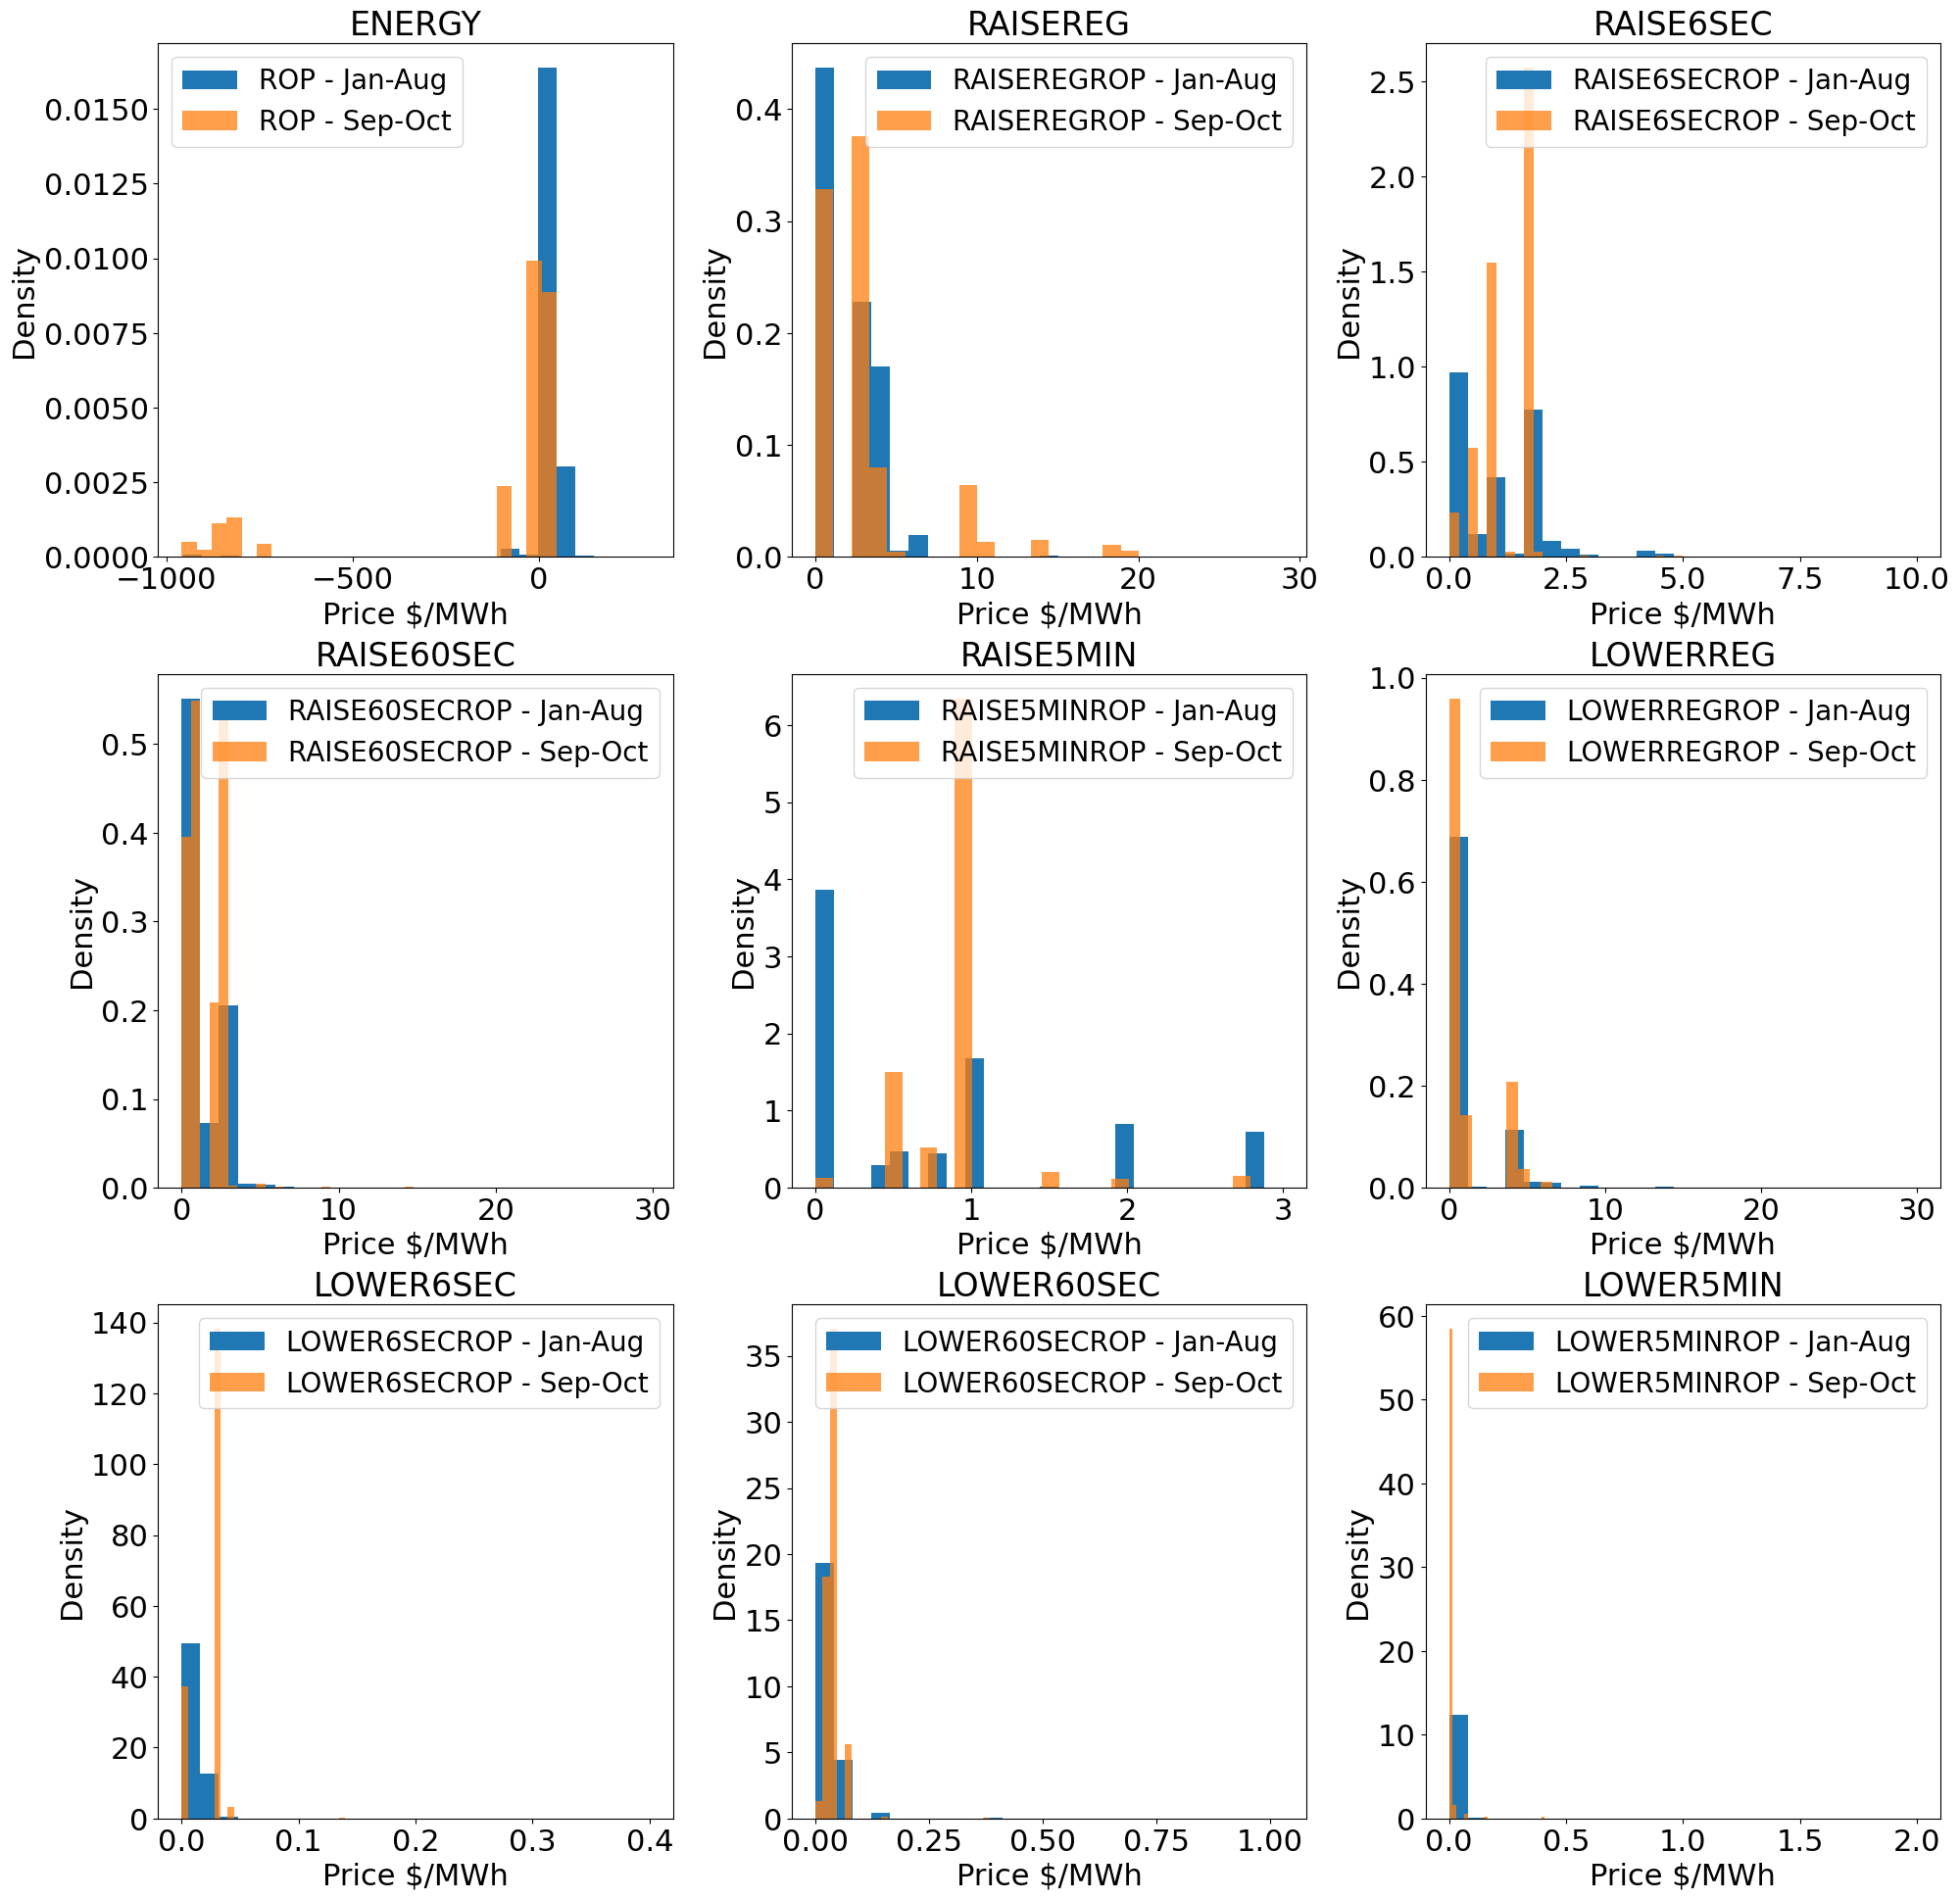

In [24]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(20,20))

for m in range(len(MARKETS)):
    mname = MARKETS[m]
    m1 = mname
    if mname == 'ENERGY':
        m1 = ''

    # plot the time series prices
    ax[m//3][m%3].hist( prices_df_tosep[f'{m1}ROP'], bins=25, label=f'{m1}ROP - Jan-Aug', density=True)
    ax[m//3][m%3].hist( prices_df_fromsep[f'{m1}ROP'], bins=25, label=f'{m1}ROP - Sep-Oct', density=True, alpha=0.75)

    # set the titles
    ax[m//3][m%3].set_title(f'{mname}', fontsize=24)
    ax[m//3][m%3].xaxis.set_tick_params(labelsize=22)
    ax[m//3][m%3].yaxis.set_tick_params(labelsize=22)
    ax[m//3][m%3].set_ylabel('Density', fontsize=22)
    ax[m//3][m%3].set_xlabel('Price $/MWh', fontsize=22)
    ax[m//3][m%3].legend(fontsize=20)
    

fig.tight_layout()
# fig.suptitle("MeritOrderNEM density of output prices comparing Jan-Aug to Sep-Oct 2019", size=22)
fig.subplots_adjust(top=0.95)
  
plt.show()
fig.savefig('merit_order_months_diff.png', bbox_inches='tight', dpi=250)

# Reward plots (from Tensorboard)

In [1]:
# reward plot of joint reg bidder
import pandas as pd
RESULTS_PATH = 'E:/Code/Calliope/results'
df_reward = pd.read_csv(f'{RESULTS_PATH}/SAC_JOINT_JantoJune_PM_all_longtrain_arb_indicator_noreg_0_rewards.csv')

In [7]:
df_reward

,Wall time,Step,Value
0,1.728430e+09,1152,-3785.721436
1,1.728430e+09,2304,-3634.720459
2,1.728430e+09,3456,-2369.189453
3,1.728430e+09,4608,-1758.851685
4,1.728430e+09,5760,-1327.294678
...,...,...,...
429,1.728444e+09,495360,5570.897461
430,1.728444e+09,496512,5590.785645
431,1.728444e+09,497664,5508.458008
432,1.728445e+09,498816,5515.737793


In [2]:
df_reward.head()

,Wall time,Step,Value
0,1.728430e+09,1152,-3785.721436
1,1.728430e+09,2304,-3634.720459
2,1.728430e+09,3456,-2369.189453
3,1.728430e+09,4608,-1758.851685
4,1.728430e+09,5760,-1327.294678


In [22]:
summary_df = pd.read_csv(r'E:\Code\Calliope\notebooks\summary_df_final_cumulative_revenues.csv')
summary_df['Step'] = summary_df['steps']

In [37]:
top_timesteps = summary_df.sort_values('final_revenue', ascending=False).head(5)[['steps', 'final_revenue']]

In [64]:
import locale
locale.setlocale( locale.LC_ALL, '' )

'English_Australia.1252'

In [88]:
summary_df['final_revenue_currency'] = summary_df['final_revenue'].apply(lambda x: locale.currency(round(x), grouping=True))

In [93]:
summary_df

,model_name,steps,final_revenue,Step,final_revenue_currency
0,SAC_JOINT_JantoJune_PM_all_longtrain_arb_indic...,20000,3.498705e+06,20000,"$3,498,705.00"
1,SAC_JOINT_JantoJune_PM_all_longtrain_arb_indic...,40000,1.270709e+07,40000,"$12,707,090.00"
2,SAC_JOINT_JantoJune_PM_all_longtrain_arb_indic...,60000,8.224373e+06,60000,"$8,224,373.00"
3,SAC_JOINT_JantoJune_PM_all_longtrain_arb_indic...,80000,-8.346847e+06,80000,"$-8,346,847.00"
4,SAC_JOINT_JantoJune_PM_all_longtrain_arb_indic...,100000,1.679946e+04,100000,"$16,799.00"
5,SAC_JOINT_JantoJune_PM_all_longtrain_arb_indic...,120000,-3.473382e+06,120000,"$-3,473,382.00"
6,SAC_JOINT_JantoJune_PM_all_longtrain_arb_indic...,140000,-1.492528e+06,140000,"$-1,492,528.00"
7,SAC_JOINT_JantoJune_PM_all_longtrain_arb_indic...,160000,1.259375e+07,160000,"$12,593,754.00"
8,SAC_JOINT_JantoJune_PM_all_longtrain_arb_indic...,180000,-2.073789e+06,180000,"$-2,073,789.00"
9,SAC_JOINT_JantoJune_PM_all_longtrain_arb_indic...,200000,-1.892566e+05,200000,"$-189,257.00"


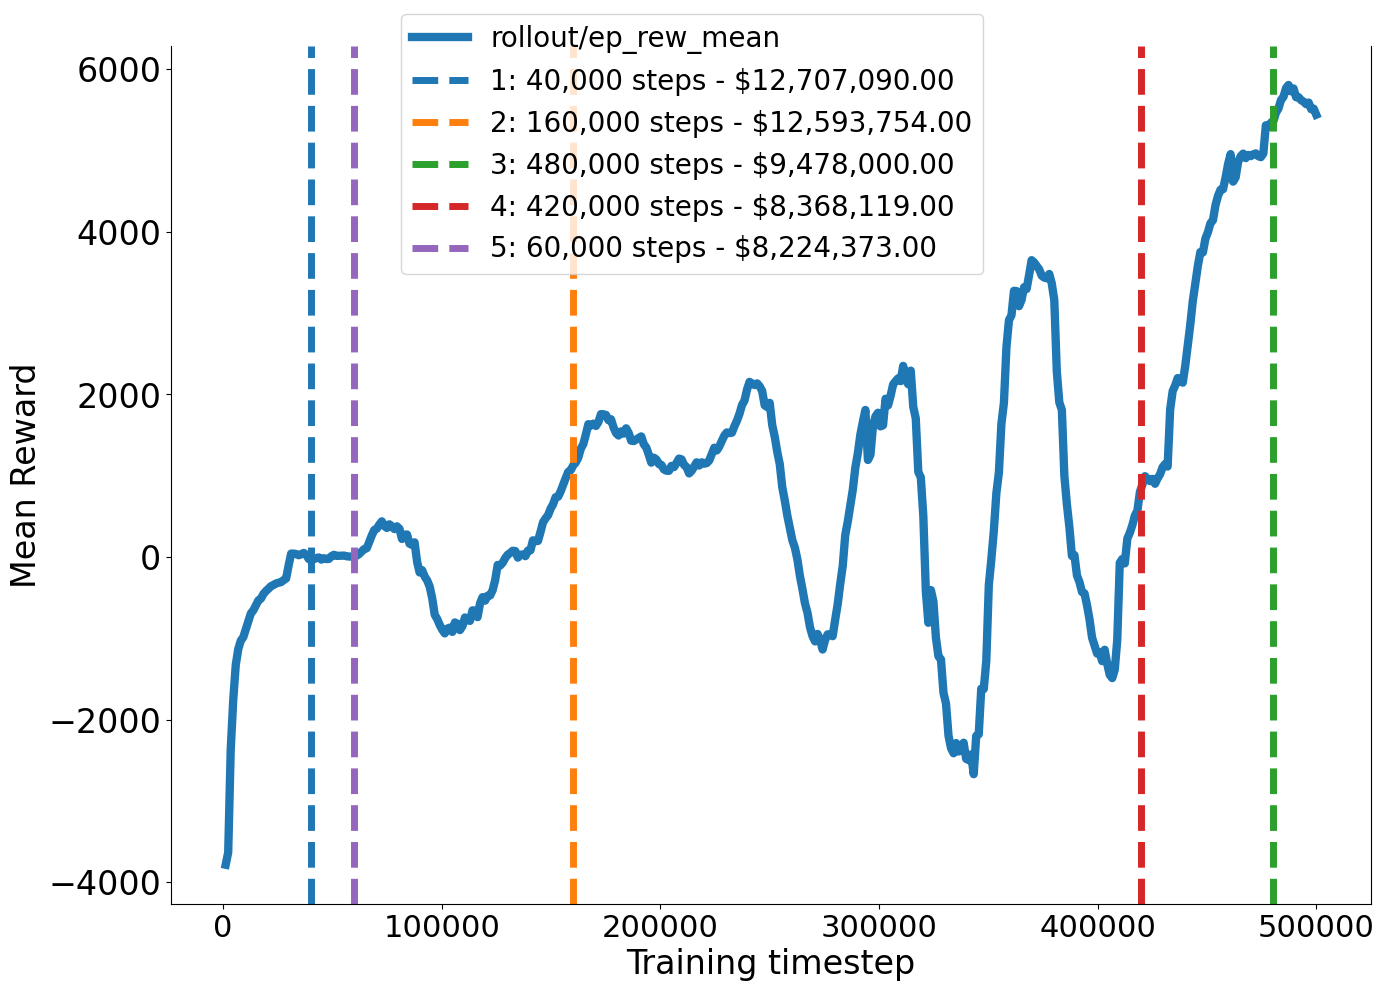

In [79]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


fig, ax = plt.subplots(figsize=(14,10))

ax.plot(df_reward.Step, df_reward.Value, label='rollout/ep_rew_mean', linewidth =6)

# ax2 = ax.twinx()

# ax2.plot(results_df.SETTLEMENTDATE, results_df.ENERGY_price, color='r', alpha=0.3, label='Energy Price')
ax.set_xlabel('Training timestep', fontsize=24)
ax.set_ylabel('Mean Reward', fontsize=24)

ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=24)

# ax2.yaxis.set_tick_params(labelsize=16)
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

ax.spines["top"].set_visible(False)
# ax2.spines["top"].set_visible(False)
for idx, row in top_timesteps.reset_index(drop=True).iterrows():
    #print(row)
    
    steps, revenue = row
    steps=int(steps)
    revenue_fmt = locale.currency( round(revenue, ndigits=0), grouping=True )
    ax.axvline(steps, linewidth=5, linestyle='dashed', color=colors[idx], label=f'{idx+1}: {steps:,} steps - {revenue_fmt}')
# ax.axvline(200000, linewidth=5, linestyle='dotted', color='black',label='200,000 timesteps')

fig.tight_layout()
# fig.suptitle("100 episodes mean reward over time", size=26)
fig.subplots_adjust(top=0.95)
fig.legend(fontsize=20, loc='upper center')

In [80]:
fig.savefig(f'{RESULTS_PATH}/mean_reward_against_best_cumulative_results.png', bbox_inches='tight', dpi=250)